In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from statsmodels.tsa.arima.model import ARIMA

In [50]:
hcho_data = pd.read_csv('DataFrame\\processed_df.csv')

In [51]:
hcho_data.head()

,HCHO_reading,Location,Current_Date,Next_Date
0,0.000088,kurunegala proper,2019-01-01,2019-01-02
1,0.000137,kurunegala proper,2019-01-02,2019-01-03
2,0.000148,kurunegala proper,2019-01-03,2019-01-04
3,0.000148,kurunegala proper,2019-01-04,2019-01-05
4,0.000249,kurunegala proper,2019-01-05,2019-01-06


In [52]:
hcho_data.dtypes

HCHO_reading    float64
Location         object
Current_Date     object
Next_Date        object
dtype: object

## Trends over time

## HCHO level changes over past years

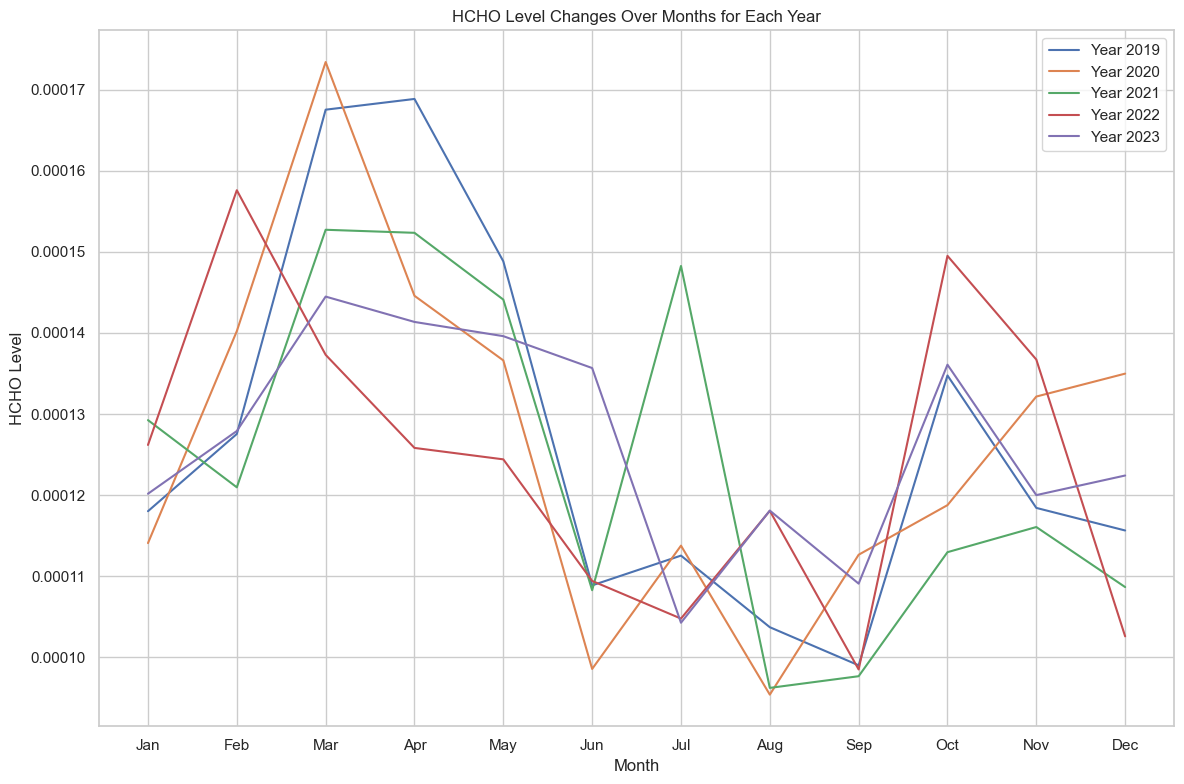

In [53]:
hcho_data['Current_Date'] = pd.to_datetime(hcho_data['Current_Date'])

# get year and month from the Date column
hcho_data['Year'] = hcho_data['Current_Date'].dt.year
hcho_data['Month'] = hcho_data['Current_Date'].dt.month

# group data by year and month and calculate mean HCHO level
monthly_mean_hcho = hcho_data.groupby(['Year', 'Month'])['HCHO_reading'].mean().reset_index()

# month names
month_names = [calendar.month_abbr[i] for i in range(1, 13)]

# plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# loop through each year and plot HCHO levels over months
for year in monthly_mean_hcho['Year'].unique():
    data_year = monthly_mean_hcho[monthly_mean_hcho['Year'] == year]
    plt.plot(data_year['Month'], data_year['HCHO_reading'], label=f'Year {year}')

plt.xlabel('Month')
plt.ylabel('HCHO Level')
plt.title('HCHO Level Changes Over Months for Each Year')
plt.xticks(range(1, 13), month_names)  # month names obtained from the calendar module
plt.legend()
plt.tight_layout()
plt.show()

In [54]:
hcho_data.head()

,HCHO_reading,Location,Current_Date,Next_Date,Year,Month
0,0.000088,kurunegala proper,2019-01-01,2019-01-02,2019,1
1,0.000137,kurunegala proper,2019-01-02,2019-01-03,2019,1
2,0.000148,kurunegala proper,2019-01-03,2019-01-04,2019,1
3,0.000148,kurunegala proper,2019-01-04,2019-01-05,2019,1
4,0.000249,kurunegala proper,2019-01-05,2019-01-06,2019,1


In [55]:
hcho_data.dtypes

HCHO_reading           float64
Location                object
Current_Date    datetime64[ns]
Next_Date               object
Year                     int32
Month                    int32
dtype: object

When comparing HCHO level changes over months throughout five years, there is a trend of lower HCHO levels in June to September timeframe compared  to March to May.

HCHO levels can be vary due to several reasons. Here are some reasons to affect HCHO level.

1.Seasonal temperature variations
2.Ventilation patterns
3.Biomass burning
4.Industrial emissions
5.Meteorological factors

When we consider about Sri Lanka, From March to May timeframe generally has warmer temperature. So it can potentially leading to higher HCHO concentrations.

From June to September timeframe is the Southwest monsoon season. So the lower temperatures can lead to potentially lowering HCHO emissions. Rainfall during the monsoon can help remove HCHO from the air through a process called scavenging, contributing to lower HCHO levels.


References - https://climateknowledgeportal.worldbank.org/country/sri-lanka/climate-data-historical, https://www.ncbi.nlm.nih.gov/books/NBK138711/   

According to the Department of Meteorology Sri Lanaka the Climate experienced during 12 months period can be characterized in to 4 climate seasons.

References - https://www.meteo.gov.lk/index.php?option=com_content&view=article&id=94&Itemid=310&lang=en&lang=en

*1. First Inter-monsoon Season (March - April)*

*2. Southwest -monsoon Season (May - September)*

*3. Second Inter-monsoon Season (October-November)*

*4. Northeast -monsoon Season (December - February)*

So we can analyze seasonal variations based on these climate changes in Sri lnaka

In [56]:
# date ranges for each climate season using month numbers
seasons = {
    'First Inter-monsoon Season': (3, 4),  # March, April
    'Southwest Monsoon Season': (5, 6, 7, 8, 9),  # May to September
    'Second Inter-monsoon Season': (10, 11),  # October, November
    'Northeast Monsoon Season': (12, 1, 2)  # December to February
}

In [57]:
# Convert 'Current_Date' column to datetime format
hcho_data['Current_Date'] = pd.to_datetime(hcho_data['Current_Date'])

### 2019 seasonal variation analysis

In [58]:
# Filter data for the year 2019
hcho_data_2019 = hcho_data[hcho_data['Current_Date'].dt.year == 2019].copy()  # Make a copy to avoid warnings

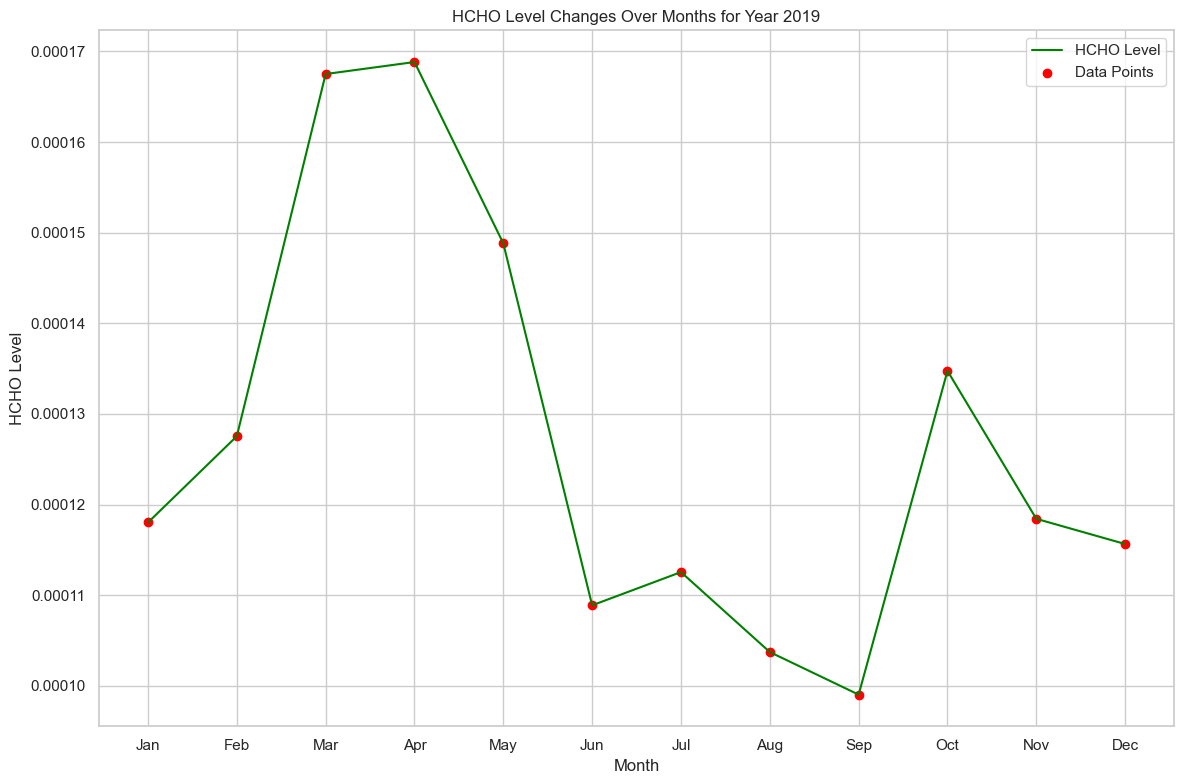

In [59]:
# Get year and month from the 'Current_Date' column using .loc for assignment
hcho_data_2019.loc[:, 'Year'] = hcho_data_2019['Current_Date'].dt.year
hcho_data_2019.loc[:, 'Month'] = hcho_data_2019['Current_Date'].dt.month

# Group data by year and month and calculate mean HCHO level
monthly_mean_hcho_2019 = hcho_data_2019.groupby(['Year', 'Month'])['HCHO_reading'].mean().reset_index()

# Get month names from the calendar module
month_names = [calendar.month_abbr[i] for i in range(1, 13)]  # e.g., ['Jan', 'Feb', 'Mar', ...]

# Plotting
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
plt.plot(monthly_mean_hcho_2019['Month'], monthly_mean_hcho_2019['HCHO_reading'], color='green', label='HCHO Level')

# Plot red data points
plt.scatter(monthly_mean_hcho_2019['Month'], monthly_mean_hcho_2019['HCHO_reading'], color='red', label='Data Points')

plt.xlabel('Month')
plt.ylabel('HCHO Level')
plt.title('HCHO Level Changes Over Months for Year 2019')
plt.xticks(range(1, 13), month_names)  # Set month names as ticks on the x-axis
plt.legend()
plt.tight_layout()
plt.show()

In 2019 there is a trend of lower HCHO levels in June to September timeframe compared  to March to May.

In [60]:
hcho_data_2019.head()

,HCHO_reading,Location,Current_Date,Next_Date,Year,Month
0,0.000088,kurunegala proper,2019-01-01,2019-01-02,2019,1
1,0.000137,kurunegala proper,2019-01-02,2019-01-03,2019,1
2,0.000148,kurunegala proper,2019-01-03,2019-01-04,2019,1
3,0.000148,kurunegala proper,2019-01-04,2019-01-05,2019,1
4,0.000249,kurunegala proper,2019-01-05,2019-01-06,2019,1


Year 2019 - First Inter-monsoon Season: Mean HCHO Level = 0.00017
Year 2019 - Southwest Monsoon Season: Mean HCHO Level = 0.00011
Year 2019 - Second Inter-monsoon Season: Mean HCHO Level = 0.00013
Year 2019 - Northeast Monsoon Season: Mean HCHO Level = 0.00012


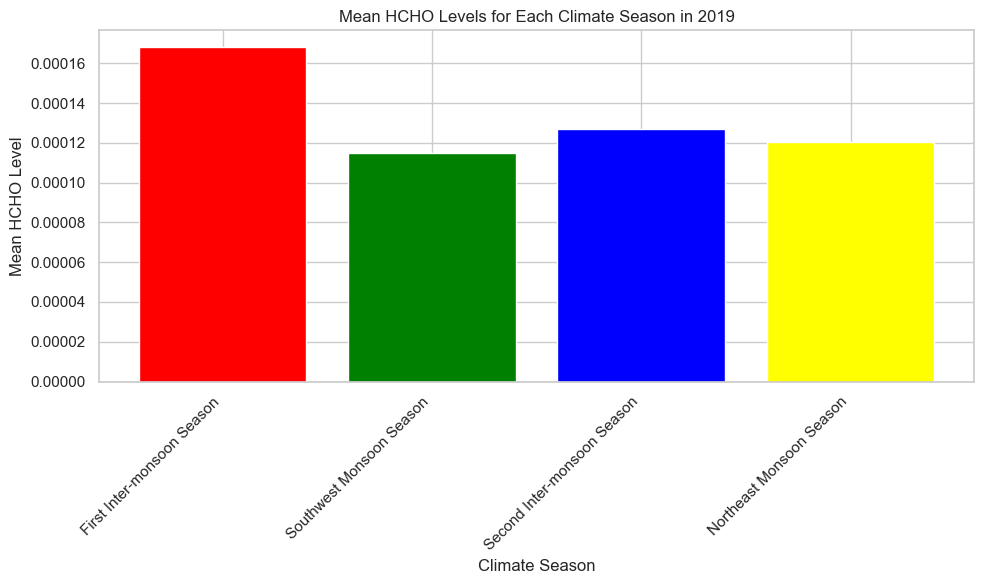

In [61]:
# Calculate mean HCHO levels for each climate season
seasonly_mean_hcho = {}
for season, months in seasons.items():
    season_data = hcho_data_2019[hcho_data_2019['Current_Date'].dt.month.isin(months)]
    mean_hcho = season_data['HCHO_reading'].mean()
    seasonly_mean_hcho[season] = mean_hcho
    print(f"Year 2019 - {season}: Mean HCHO Level = {mean_hcho:.5f}")

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(seasonly_mean_hcho.keys(), seasonly_mean_hcho.values(), color=['red', 'green', 'blue', 'yellow'])
plt.xlabel('Climate Season')
plt.ylabel('Mean HCHO Level')
plt.title('Mean HCHO Levels for Each Climate Season in 2019')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 2020 seasonal variation analysis

In [62]:
# Filter data for the year 2020
hcho_data_2020 = hcho_data[hcho_data['Current_Date'].dt.year == 2020].copy()  # Make a copy to avoid warnings

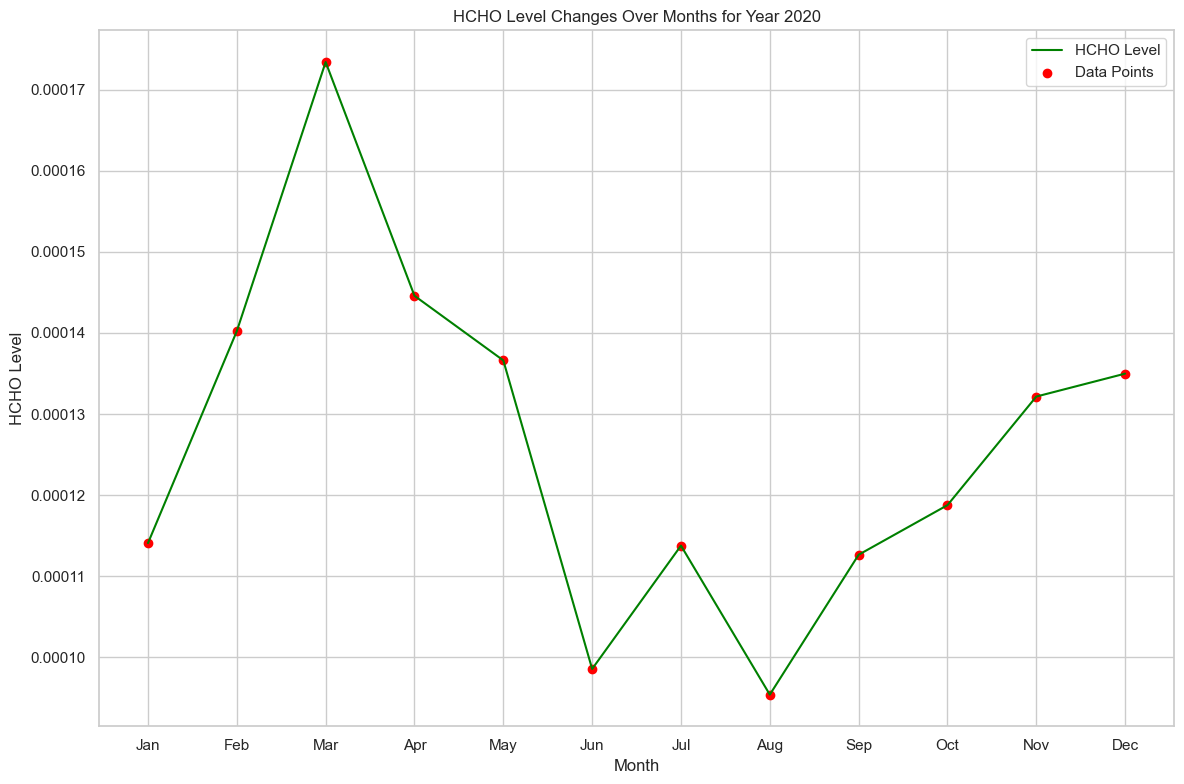

In [63]:
# Get year and month from the 'Current_Date' column using .loc for assignment
hcho_data_2020.loc[:, 'Year'] = hcho_data_2020['Current_Date'].dt.year
hcho_data_2020.loc[:, 'Month'] = hcho_data_2020['Current_Date'].dt.month

# Group data by year and month and calculate mean HCHO level
monthly_mean_hcho_2020 = hcho_data_2020.groupby(['Year', 'Month'])['HCHO_reading'].mean().reset_index()

# Get month names from the calendar module
month_names = [calendar.month_abbr[i] for i in range(1, 13)]  # e.g., ['Jan', 'Feb', 'Mar', ...]

# Plotting
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
plt.plot(monthly_mean_hcho_2020['Month'], monthly_mean_hcho_2020['HCHO_reading'], color='green', label='HCHO Level')

# Plot red data points
plt.scatter(monthly_mean_hcho_2020['Month'], monthly_mean_hcho_2020['HCHO_reading'], color='red', label='Data Points')

plt.xlabel('Month')
plt.ylabel('HCHO Level')
plt.title('HCHO Level Changes Over Months for Year 2020')
plt.xticks(range(1, 13), month_names)  # Set month names as ticks on the x-axis
plt.legend()
plt.tight_layout()
plt.show()

In 2020 there is a trend of lower HCHO levels in June to September timeframe compared  to March to May.

Year 2019 - First Inter-monsoon Season: Mean HCHO Level = 0.00016
Year 2019 - Southwest Monsoon Season: Mean HCHO Level = 0.00011
Year 2019 - Second Inter-monsoon Season: Mean HCHO Level = 0.00013
Year 2019 - Northeast Monsoon Season: Mean HCHO Level = 0.00013


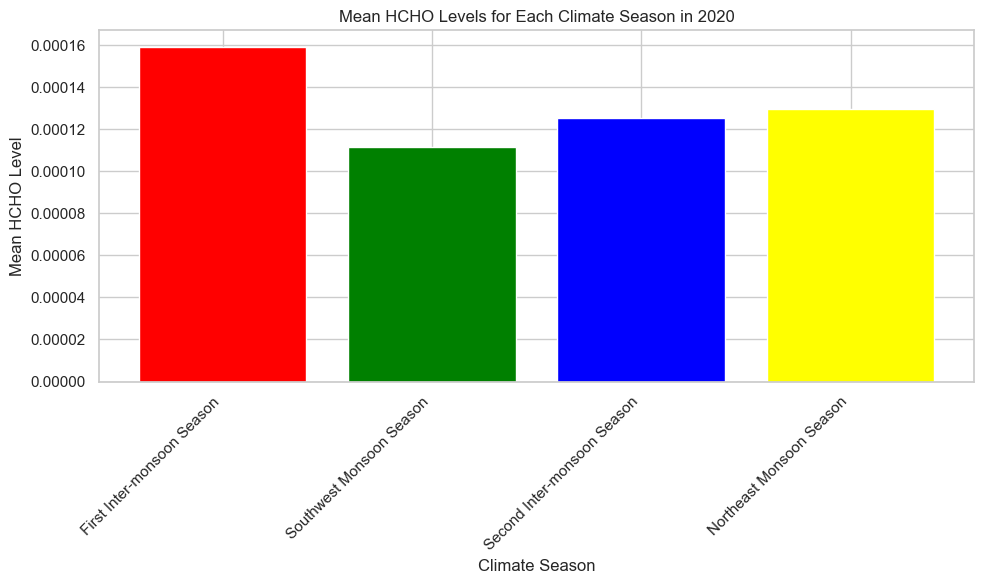

In [64]:
# Calculate mean HCHO levels for each climate season
seasonly_mean_hcho = {}
for season, months in seasons.items():
    season_data = hcho_data_2020[hcho_data_2020['Current_Date'].dt.month.isin(months)]
    mean_hcho = season_data['HCHO_reading'].mean()
    seasonly_mean_hcho[season] = mean_hcho
    print(f"Year 2019 - {season}: Mean HCHO Level = {mean_hcho:.5f}")

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(seasonly_mean_hcho.keys(), seasonly_mean_hcho.values(), color=['red', 'green', 'blue', 'yellow'])
plt.xlabel('Climate Season')
plt.ylabel('Mean HCHO Level')
plt.title('Mean HCHO Levels for Each Climate Season in 2020')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 2021 seasonal variation analysis

In [65]:
# Filter data for the year 2021
hcho_data_2021 = hcho_data[hcho_data['Current_Date'].dt.year == 2021].copy()  # Make a copy to avoid warnings

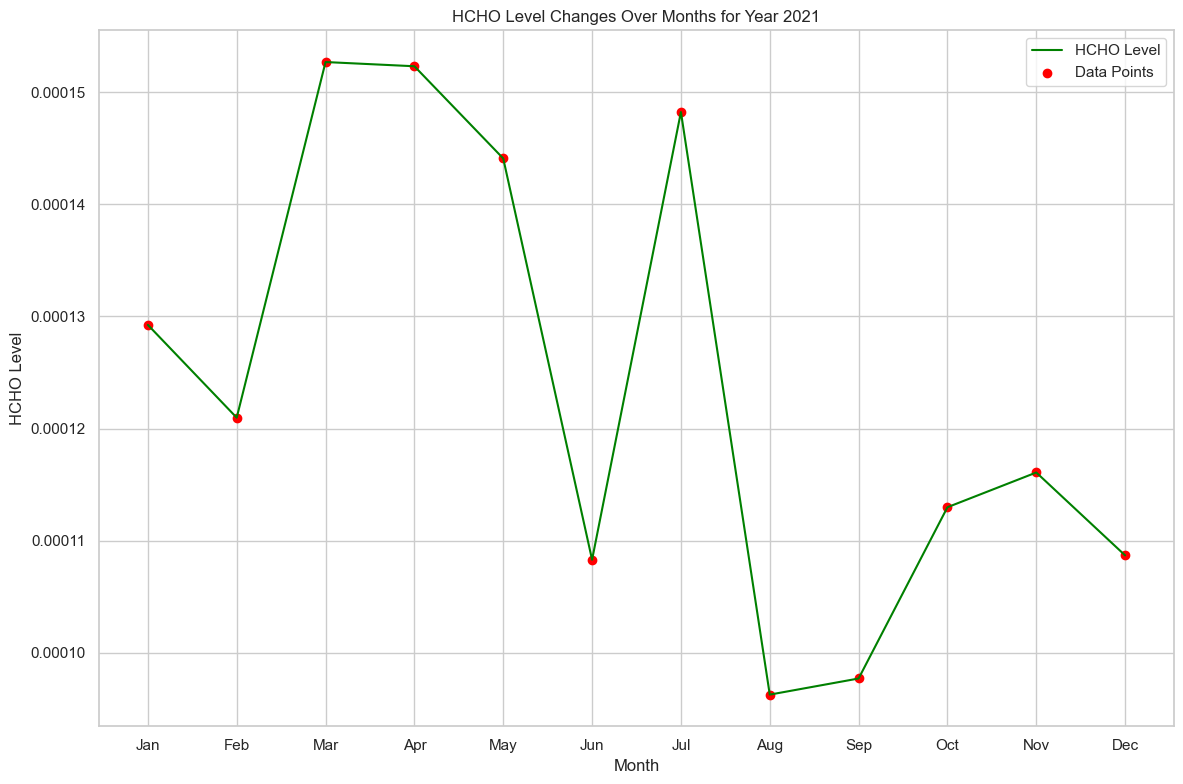

In [66]:
# Get year and month from the 'Current_Date' column using .loc for assignment
hcho_data_2021.loc[:, 'Year'] = hcho_data_2021['Current_Date'].dt.year
hcho_data_2021.loc[:, 'Month'] = hcho_data_2021['Current_Date'].dt.month

# Group data by year and month and calculate mean HCHO level
monthly_mean_hcho_2021 = hcho_data_2021.groupby(['Year', 'Month'])['HCHO_reading'].mean().reset_index()

# Get month names from the calendar module
month_names = [calendar.month_abbr[i] for i in range(1, 13)]  # e.g., ['Jan', 'Feb', 'Mar', ...]

# Plotting
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
plt.plot(monthly_mean_hcho_2021['Month'], monthly_mean_hcho_2021['HCHO_reading'], color='green', label='HCHO Level')

# Plot red data points
plt.scatter(monthly_mean_hcho_2021['Month'], monthly_mean_hcho_2021['HCHO_reading'], color='red', label='Data Points')

plt.xlabel('Month')
plt.ylabel('HCHO Level')
plt.title('HCHO Level Changes Over Months for Year 2021')
plt.xticks(range(1, 13), month_names)  # Set month names as ticks on the x-axis
plt.legend()
plt.tight_layout()
plt.show()

In 2021 there is a trend of lower HCHO levels in August to September timeframe compared  to March to May.

Year 2019 - First Inter-monsoon Season: Mean HCHO Level = 0.00015
Year 2019 - Southwest Monsoon Season: Mean HCHO Level = 0.00012
Year 2019 - Second Inter-monsoon Season: Mean HCHO Level = 0.00011
Year 2019 - Northeast Monsoon Season: Mean HCHO Level = 0.00012


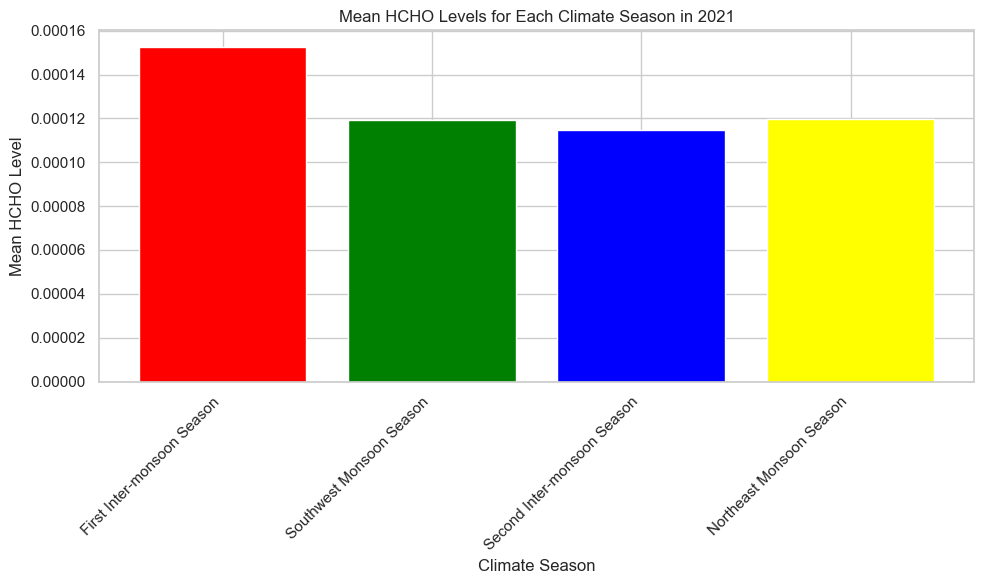

In [67]:
# Calculate mean HCHO levels for each climate season
seasonly_mean_hcho = {}
for season, months in seasons.items():
    season_data = hcho_data_2021[hcho_data_2021['Current_Date'].dt.month.isin(months)]
    mean_hcho = season_data['HCHO_reading'].mean()
    seasonly_mean_hcho[season] = mean_hcho
    print(f"Year 2019 - {season}: Mean HCHO Level = {mean_hcho:.5f}")

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(seasonly_mean_hcho.keys(), seasonly_mean_hcho.values(), color=['red', 'green', 'blue', 'yellow'])
plt.xlabel('Climate Season')
plt.ylabel('Mean HCHO Level')
plt.title('Mean HCHO Levels for Each Climate Season in 2021')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 2022 seasonal variation analysis

In [68]:
# Filter data for the year 2022
hcho_data_2022 = hcho_data[hcho_data['Current_Date'].dt.year == 2022].copy()  # Make a copy to avoid warnings

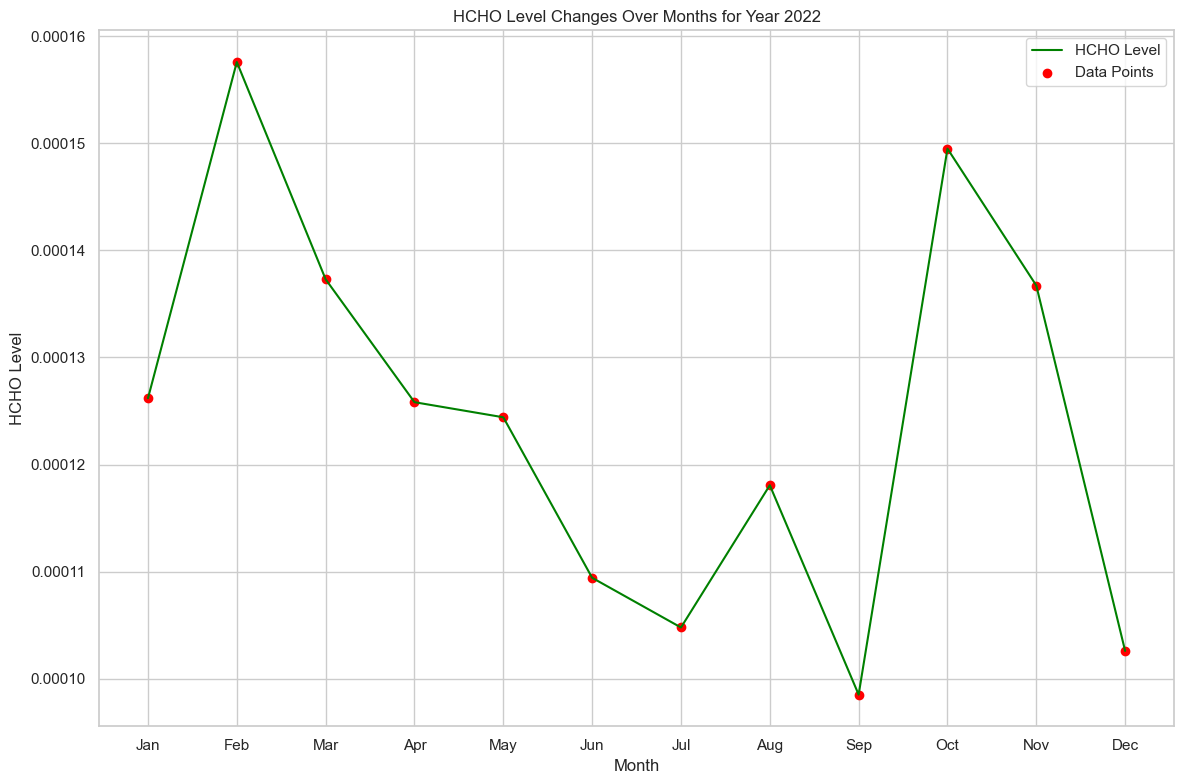

In [69]:
# Get year and month from the 'Current_Date' column using .loc for assignment
hcho_data_2022.loc[:, 'Year'] = hcho_data_2022['Current_Date'].dt.year
hcho_data_2022.loc[:, 'Month'] = hcho_data_2022['Current_Date'].dt.month

# Group data by year and month and calculate mean HCHO level
monthly_mean_hcho_2022 = hcho_data_2022.groupby(['Year', 'Month'])['HCHO_reading'].mean().reset_index()

# Get month names from the calendar module
month_names = [calendar.month_abbr[i] for i in range(1, 13)]  # e.g., ['Jan', 'Feb', 'Mar', ...]

# Plotting
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
plt.plot(monthly_mean_hcho_2022['Month'], monthly_mean_hcho_2022['HCHO_reading'], color='green', label='HCHO Level')

# Plot red data points
plt.scatter(monthly_mean_hcho_2022['Month'], monthly_mean_hcho_2022['HCHO_reading'], color='red', label='Data Points')

plt.xlabel('Month')
plt.ylabel('HCHO Level')
plt.title('HCHO Level Changes Over Months for Year 2022')
plt.xticks(range(1, 13), month_names)  # Set month names as ticks on the x-axis
plt.legend()
plt.tight_layout()
plt.show()

In 2022 there is a trend of lower HCHO levels in June to September timeframe compared  to February to March.

Year 2019 - First Inter-monsoon Season: Mean HCHO Level = 0.00013
Year 2019 - Southwest Monsoon Season: Mean HCHO Level = 0.00011
Year 2019 - Second Inter-monsoon Season: Mean HCHO Level = 0.00014
Year 2019 - Northeast Monsoon Season: Mean HCHO Level = 0.00013


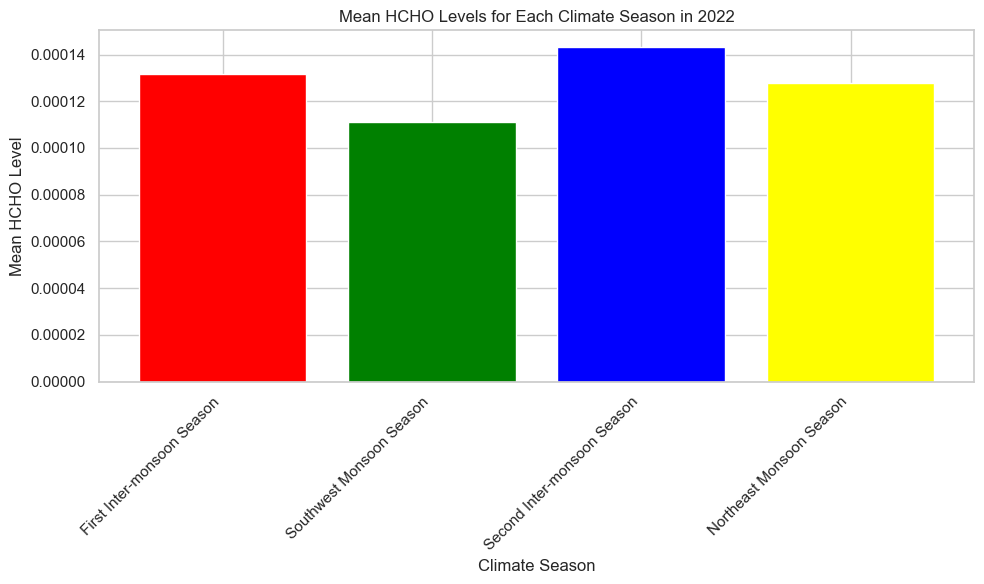

In [70]:
# Calculate mean HCHO levels for each climate season
seasonly_mean_hcho = {}
for season, months in seasons.items():
    season_data = hcho_data_2022[hcho_data_2022['Current_Date'].dt.month.isin(months)]
    mean_hcho = season_data['HCHO_reading'].mean()
    seasonly_mean_hcho[season] = mean_hcho
    print(f"Year 2019 - {season}: Mean HCHO Level = {mean_hcho:.5f}")

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(seasonly_mean_hcho.keys(), seasonly_mean_hcho.values(), color=['red', 'green', 'blue', 'yellow'])
plt.xlabel('Climate Season')
plt.ylabel('Mean HCHO Level')
plt.title('Mean HCHO Levels for Each Climate Season in 2022')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 2023 seasonal variation analysis

In [71]:
# Filter data for the year 2023
hcho_data_2023 = hcho_data[hcho_data['Current_Date'].dt.year == 2023].copy()  # Make a copy to avoid warnings

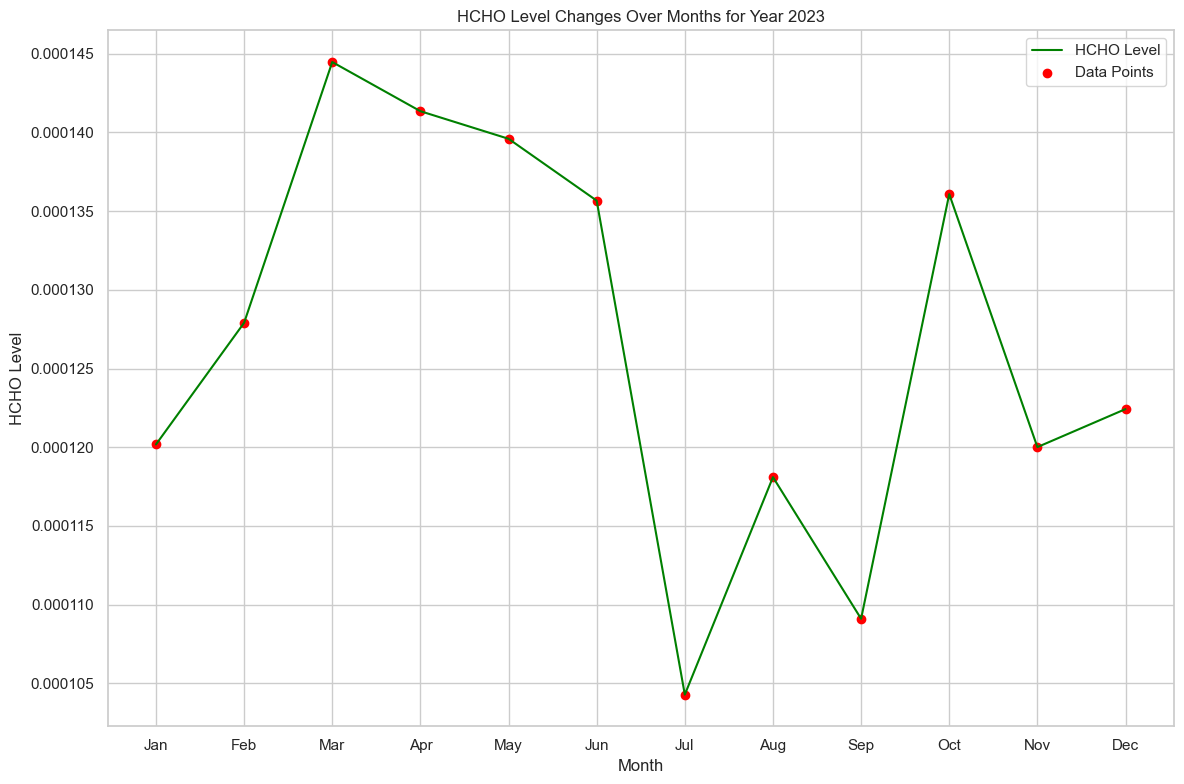

In [72]:
# Get year and month from the 'Current_Date' column using .loc for assignment
hcho_data_2023.loc[:, 'Year'] = hcho_data_2023['Current_Date'].dt.year
hcho_data_2023.loc[:, 'Month'] = hcho_data_2023['Current_Date'].dt.month

# Group data by year and month and calculate mean HCHO level
monthly_mean_hcho_2023 = hcho_data_2023.groupby(['Year', 'Month'])['HCHO_reading'].mean().reset_index()

# Get month names from the calendar module
month_names = [calendar.month_abbr[i] for i in range(1, 13)]  # e.g., ['Jan', 'Feb', 'Mar', ...]

# Plotting
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
plt.plot(monthly_mean_hcho_2023['Month'], monthly_mean_hcho_2023['HCHO_reading'], color='green', label='HCHO Level')

# Plot red data points
plt.scatter(monthly_mean_hcho_2023['Month'], monthly_mean_hcho_2023['HCHO_reading'], color='red', label='Data Points')

plt.xlabel('Month')
plt.ylabel('HCHO Level')
plt.title('HCHO Level Changes Over Months for Year 2023')
plt.xticks(range(1, 13), month_names)  # Set month names as ticks on the x-axis
plt.legend()
plt.tight_layout()
plt.show()

In 2023 there is a trend of lower HCHO levels in July to September timeframe compared  to March to May.

Year 2019 - First Inter-monsoon Season: Mean HCHO Level = 0.00014
Year 2019 - Southwest Monsoon Season: Mean HCHO Level = 0.00012
Year 2019 - Second Inter-monsoon Season: Mean HCHO Level = 0.00013
Year 2019 - Northeast Monsoon Season: Mean HCHO Level = 0.00012


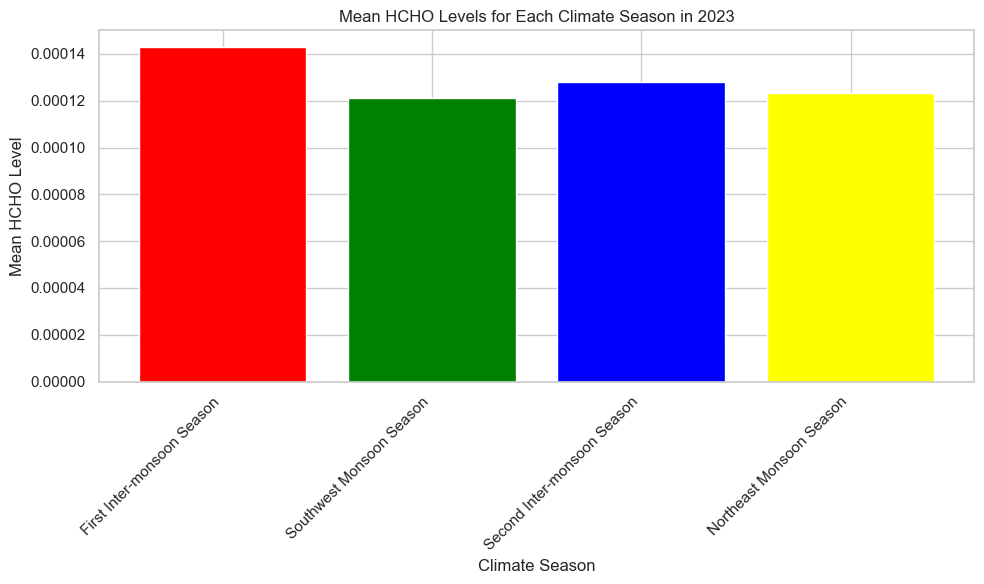

In [73]:
# Calculate mean HCHO levels for each climate season
seasonly_mean_hcho = {}
for season, months in seasons.items():
    season_data = hcho_data_2023[hcho_data_2023['Current_Date'].dt.month.isin(months)]
    mean_hcho = season_data['HCHO_reading'].mean()
    seasonly_mean_hcho[season] = mean_hcho
    print(f"Year 2019 - {season}: Mean HCHO Level = {mean_hcho:.5f}")

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(seasonly_mean_hcho.keys(), seasonly_mean_hcho.values(), color=['red', 'green', 'blue', 'yellow'])
plt.xlabel('Climate Season')
plt.ylabel('Mean HCHO Level')
plt.title('Mean HCHO Levels for Each Climate Season in 2023')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

During the warmer months of February to June in every year(2019-2023), HCHO levels reached their highest point. This coincides with Sri Lanka's inter-monsoon season of March to April, indicating that temperature could be a factor in HCHO levels. On the other hand, the onset of the southwest monsoon season from May to September may result in a decline in HCHO levels due to rain scavenging. Let's further examine these patterns over multiple years.

## 

C:\Users\benur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\benur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\benur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\benur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCac

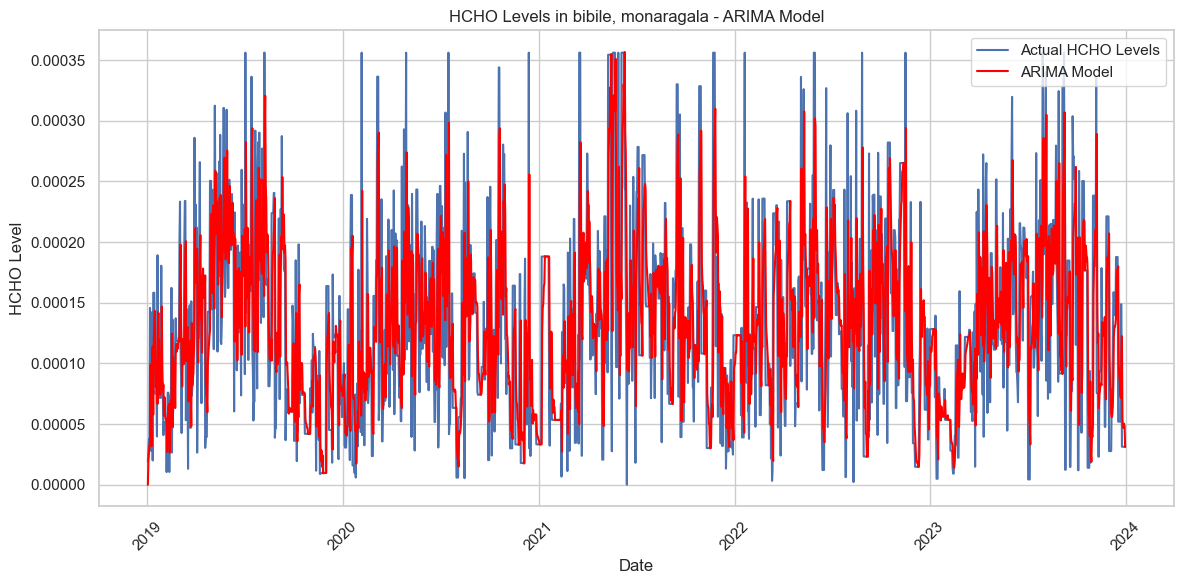

C:\Users\benur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\benur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\benur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


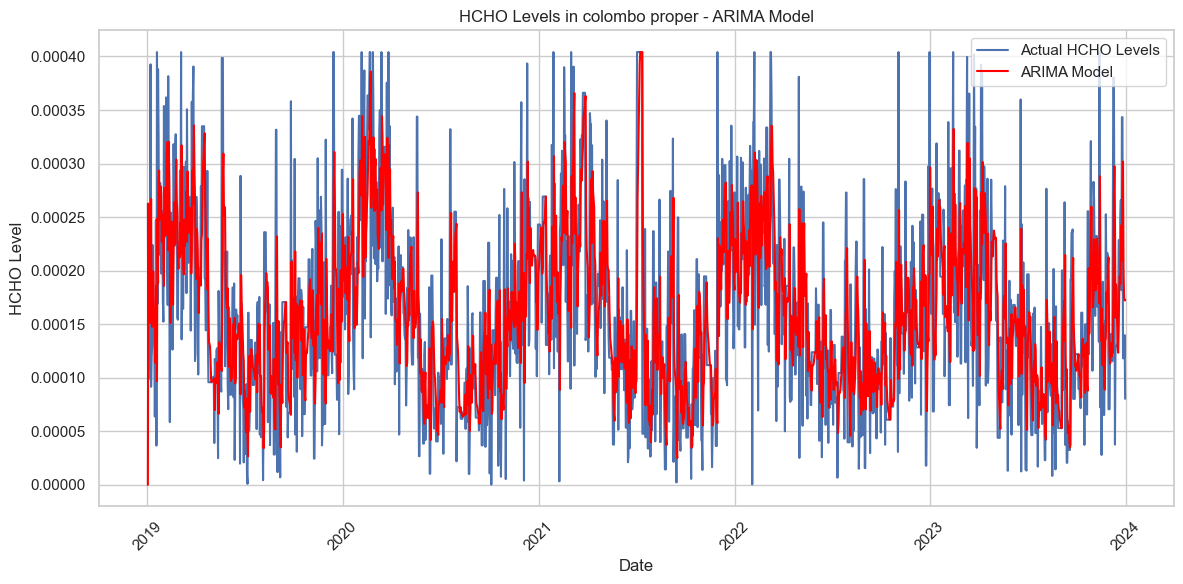

C:\Users\benur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\benur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\benur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\benur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCac

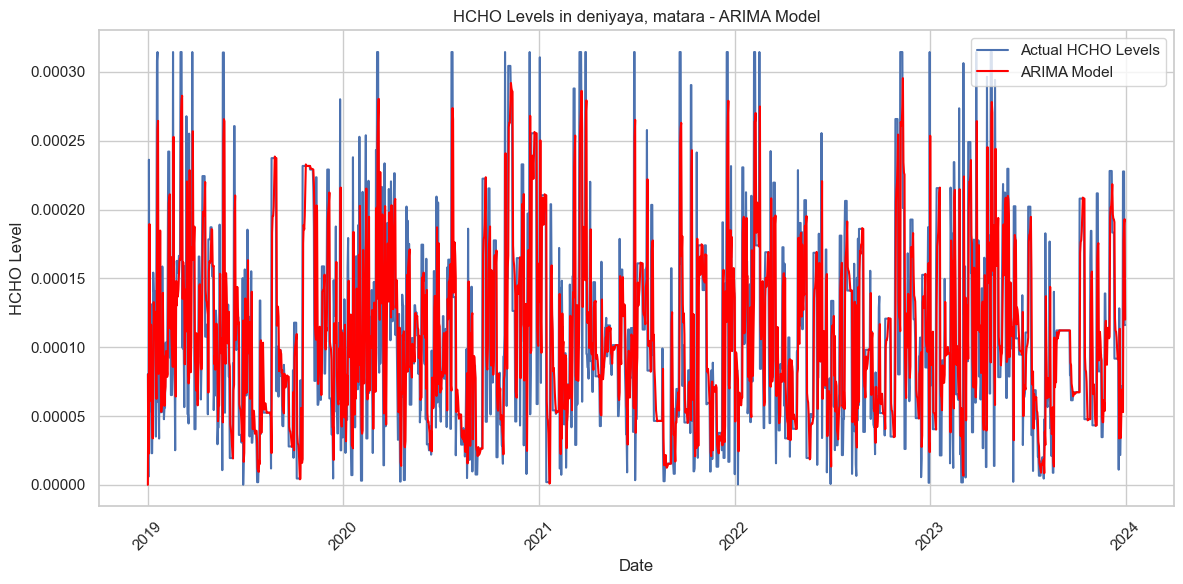

C:\Users\benur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\benur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\benur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Error fitting ARIMA model for jaffna proper: Schur decomposition solver error.


C:\Users\benur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\benur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\benur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\benur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCac

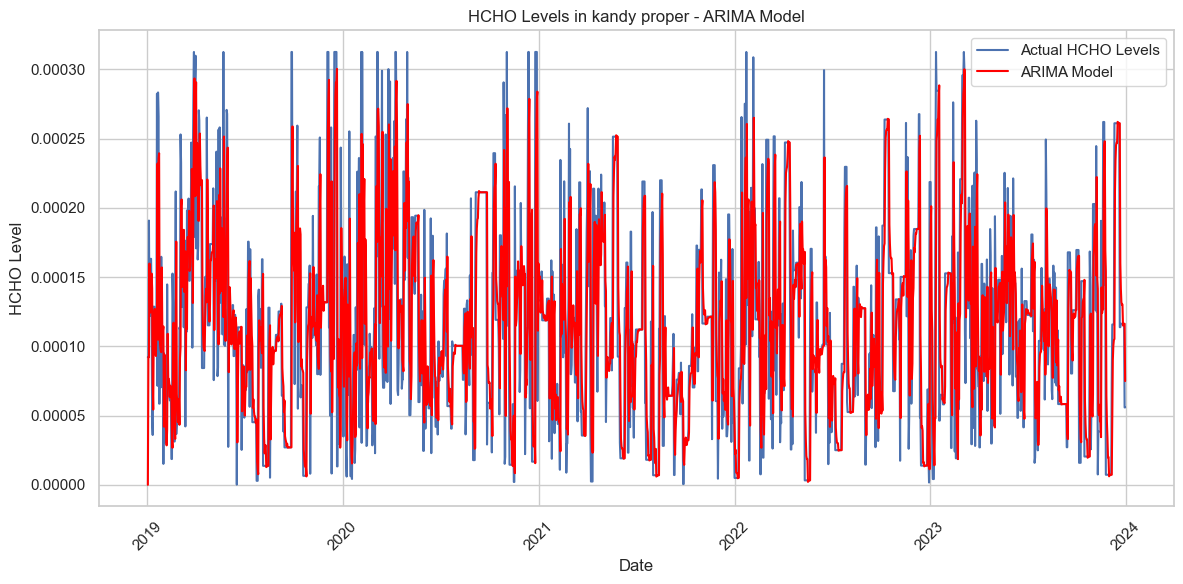

C:\Users\benur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


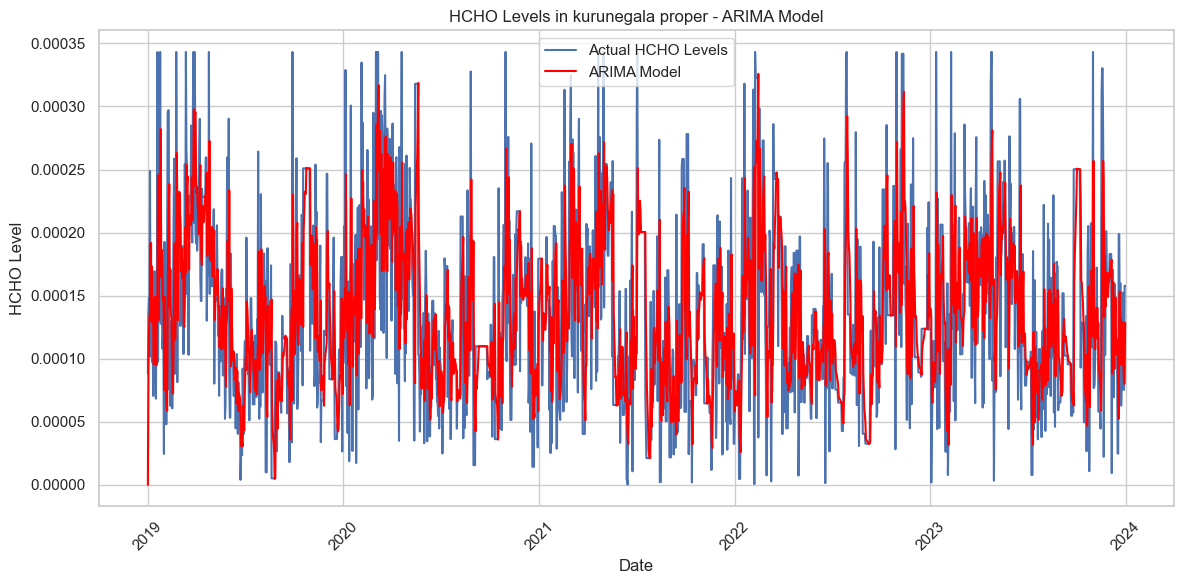

C:\Users\benur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\benur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\benur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\benur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCac

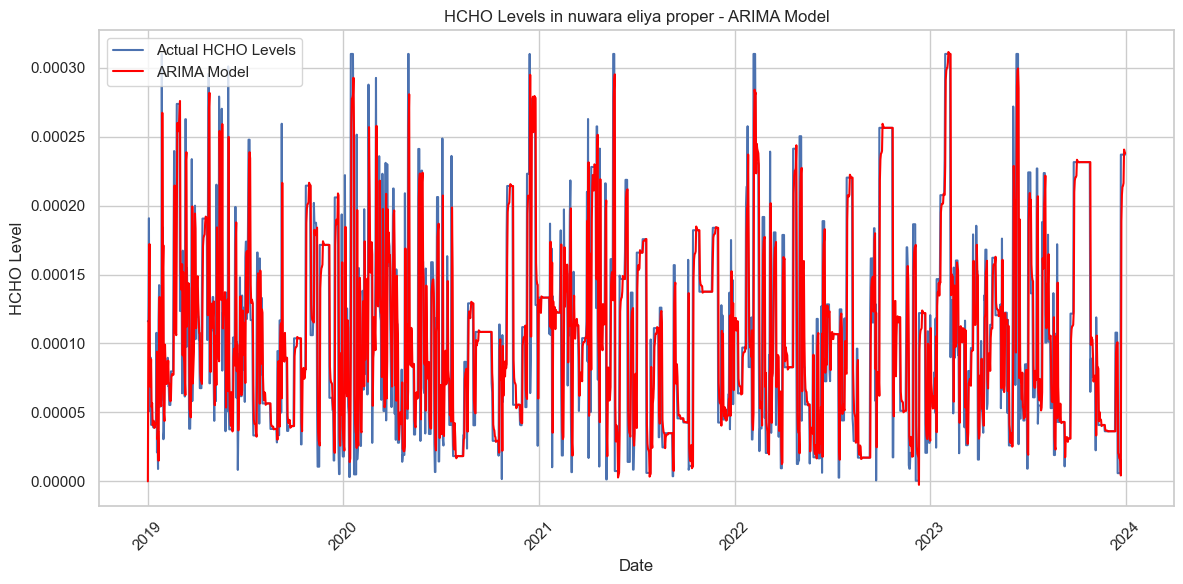

In [77]:
# Convert 'Current_Date' column to datetime format
hcho_data['Current_Date'] = pd.to_datetime(hcho_data['Current_Date'])

# Sort the data by date
hcho_data.sort_values(by='Current_Date', inplace=True)

# Function to fit ARIMA model and plot results
def fit_arima_and_plot(city_data, city_name):
    try:
        # Fit ARIMA model
        model = ARIMA(city_data['HCHO_reading'], order=(5, 1, 0))  # Example ARIMA order, adjust as needed
        model_fit = model.fit()

        # Plotting
        plt.figure(figsize=(12, 6))
        plt.plot(city_data['Current_Date'], city_data['HCHO_reading'], label='Actual HCHO Levels')
        plt.plot(city_data['Current_Date'], model_fit.fittedvalues, color='red', label='ARIMA Model')
        plt.xlabel('Date')
        plt.ylabel('HCHO Level')
        plt.title(f'HCHO Levels in {city_name} - ARIMA Model')
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error fitting ARIMA model for {city_name}: {e}")

# Perform time series analysis for each city
for city_name, city_data in hcho_data.groupby('Location'):
    fit_arima_and_plot(city_data, city_name)

## HCHO comparison across cities

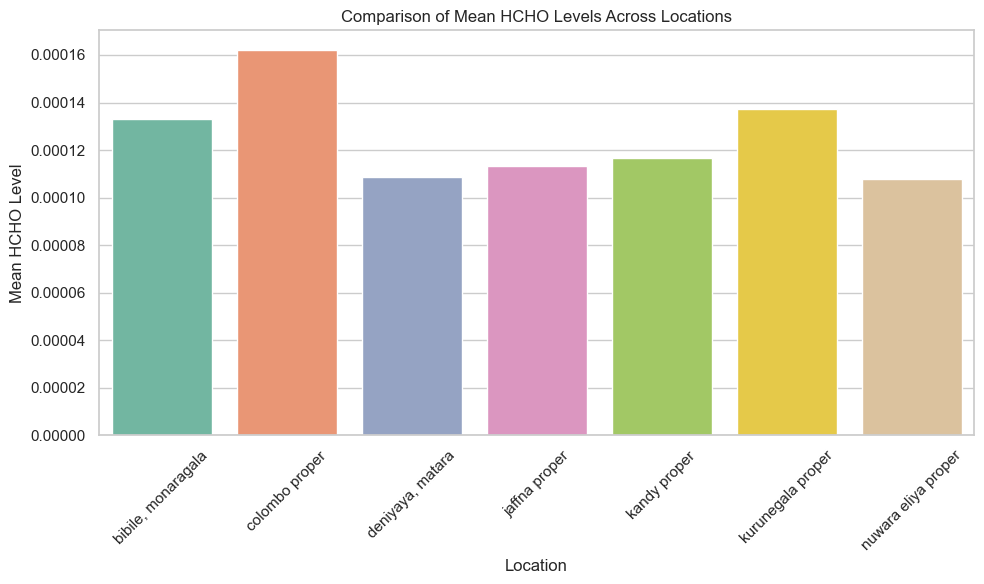

In [80]:
# group data by location and calculate mean HCHO levels
mean_hcho_by_location = hcho_data.groupby('Location')['HCHO_reading'].mean().reset_index()

# olor 
colors = sns.color_palette("Set2", len(mean_hcho_by_location))

# plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='HCHO_reading', data=mean_hcho_by_location, hue='Location', palette=colors, legend=False)
plt.xlabel('Location')
plt.ylabel('Mean HCHO Level')
plt.title('Comparison of Mean HCHO Levels Across Locations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##  COVID-19 lockdown impact 

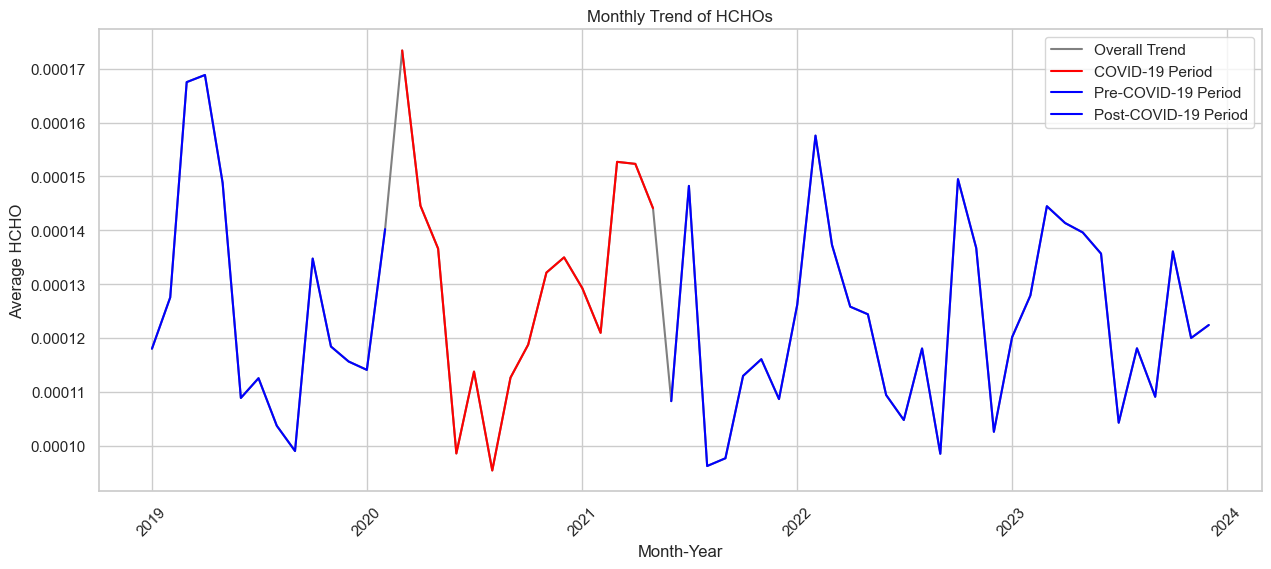

In [85]:
# Convert 'Current_Date' column to datetime
hcho_data['Current_Date'] = pd.to_datetime(hcho_data['Current_Date'])

# Set COVID-19 start and end dates
covid_start_date = pd.to_datetime('2020-03-01')
covid_end_date = pd.to_datetime('2021-05-01')

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Converting 'Current_Date' to Month-Year format for grouping
hcho_data['Month-Year'] = hcho_data['Current_Date'].dt.to_period('M')
monthly_data = hcho_data.groupby('Month-Year')['HCHO_reading'].mean().reset_index()

# Converting 'Month-Year' back to datetime for plotting
monthly_data['Month-Year'] = monthly_data['Month-Year'].dt.to_timestamp()

# Plotting the monthly trend of HCHOs
plt.figure(figsize=(15, 6))
sns.lineplot(x='Month-Year', y='HCHO_reading', data=monthly_data, color='gray', label='Overall Trend')

# Highlighting the COVID-19 period in red
covid_period = monthly_data[(monthly_data['Month-Year'] >= covid_start_date) & (monthly_data['Month-Year'] <= covid_end_date)]
sns.lineplot(x='Month-Year', y='HCHO_reading', data=covid_period, color='red', label='COVID-19 Period')

# Highlighting pre-COVID-19 and post-COVID-19 periods in blue
pre_covid_period = monthly_data[monthly_data['Month-Year'] < covid_start_date]
sns.lineplot(x='Month-Year', y='HCHO_reading', data=pre_covid_period, color='blue', label='Pre-COVID-19 Period')

post_covid_period = monthly_data[monthly_data['Month-Year'] > covid_end_date]
sns.lineplot(x='Month-Year', y='HCHO_reading', data=post_covid_period, color='blue', label='Post-COVID-19 Period')

plt.title('Monthly Trend of HCHOs')
plt.xlabel('Month-Year')
plt.ylabel('Average HCHO')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

According to this lineplot, the HCHO level has decreased rapidly the starting of the covid - 19 pandemic